In [5]:
df =pd.read_csv("Classified Data.txt")

<IPython.core.display.Javascript object>

In [6]:
df

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  TARGET CLASS  
0    0.759697  0.643798  0.879422  1.231409             1  
1    0.675334  1.013546  0.621552  1.492702             0  
2    1.626351  1.154483  0.957877  1.285597             0  
3    1.409708  1.380003  1.522692  1.153093             1  
4    1.115596  0.646691  1.463812  1.419167             1  
..        ...       ...       ...       ...           ...  
995  0.746811  0.319752  1.117340  1.348517             1  
996  1.055928  0.713193  0.958684  1.663489             0  
997  0.386802  0.389584  0.919191  1.385504             1  
998  0.855806  1.061338  1.277456  1.188063             1  
999  0.778234  0.907962  1.257190  1.364837             1  

[1000 rows x 12 columns]

In [3]:
from sklearn.preprocessing import StandardScaler


In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
scaled_feature

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

<IPython.core.display.Javascript object>

In [12]:
df_feat.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

<IPython.core.display.Javascript object>

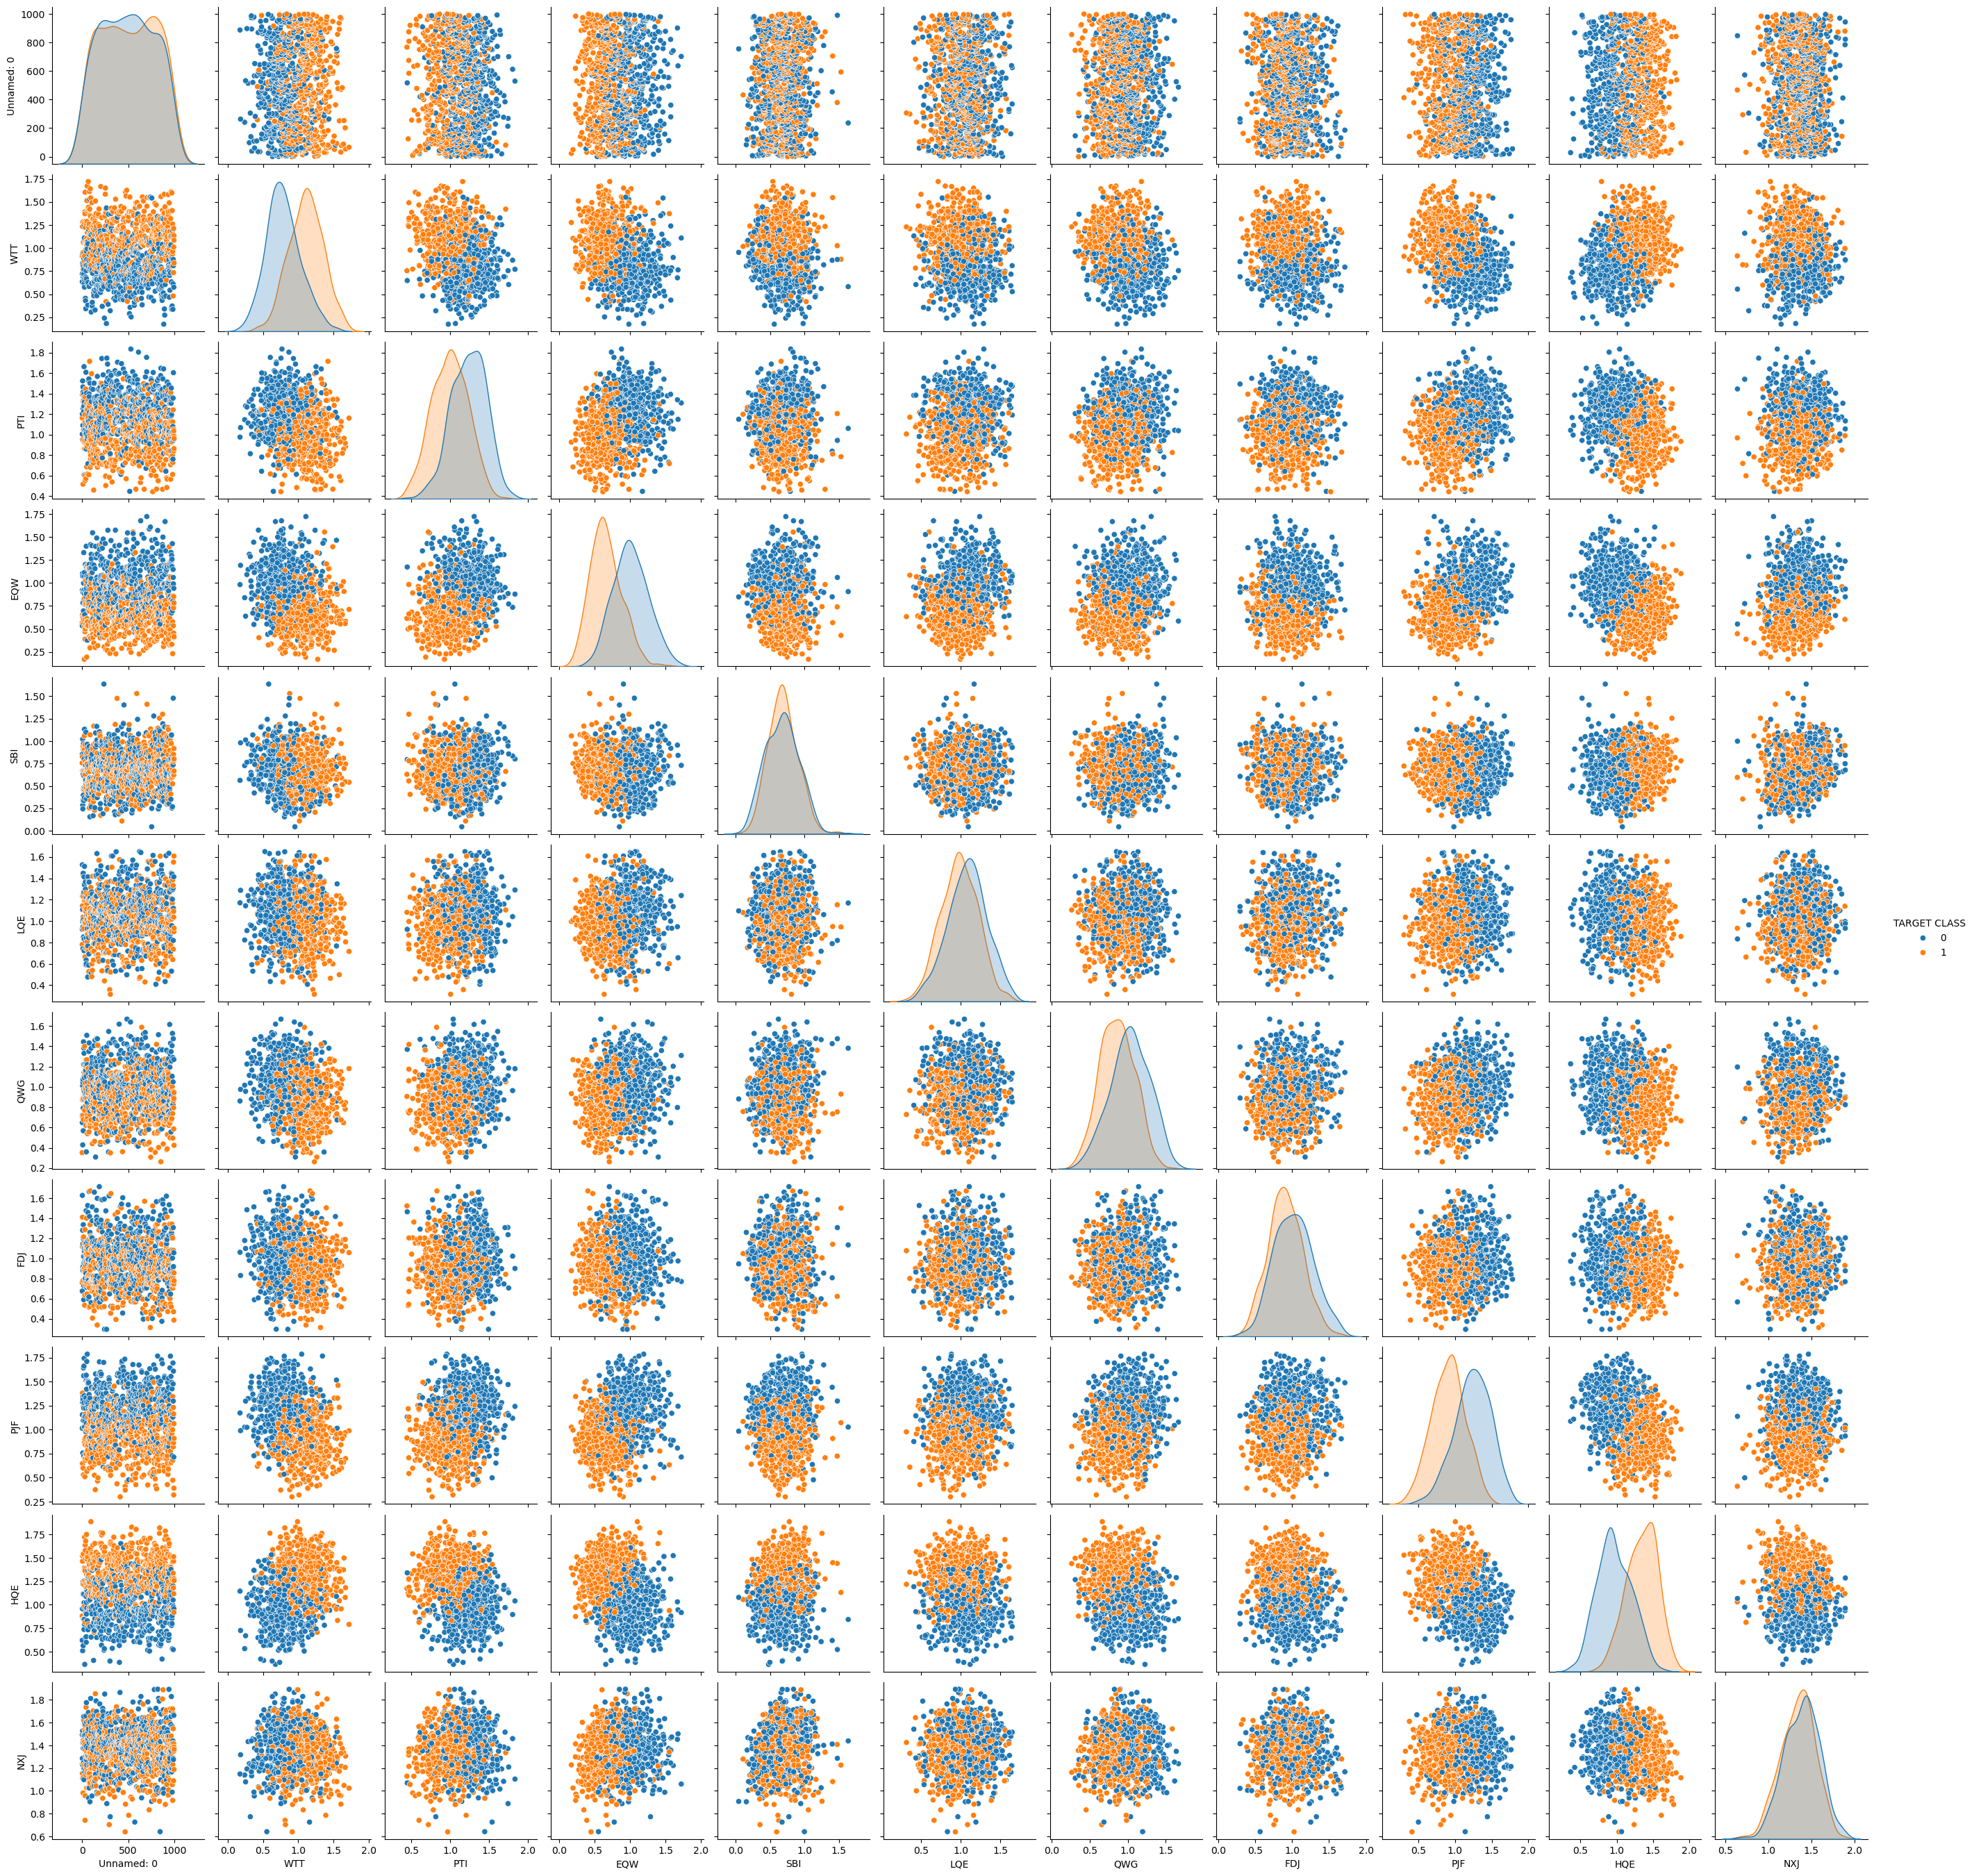

In [13]:
sns.pairplot(df,hue="TARGET CLASS")

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test,y_train,y_test=train_test_split(scaled_feature,df['TARGET CLASS'],test_size=0.30)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [24]:
print(confusion_matrix(y_test,pred))

[[141  14]
 [  8 137]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       155
           1       0.91      0.94      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [39]:
accuracy_rate=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [48]:
error_rate=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

In [46]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

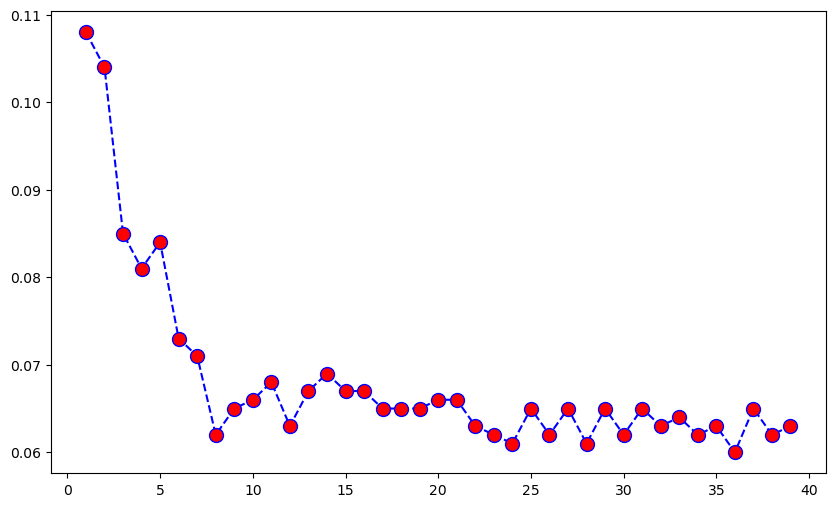

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

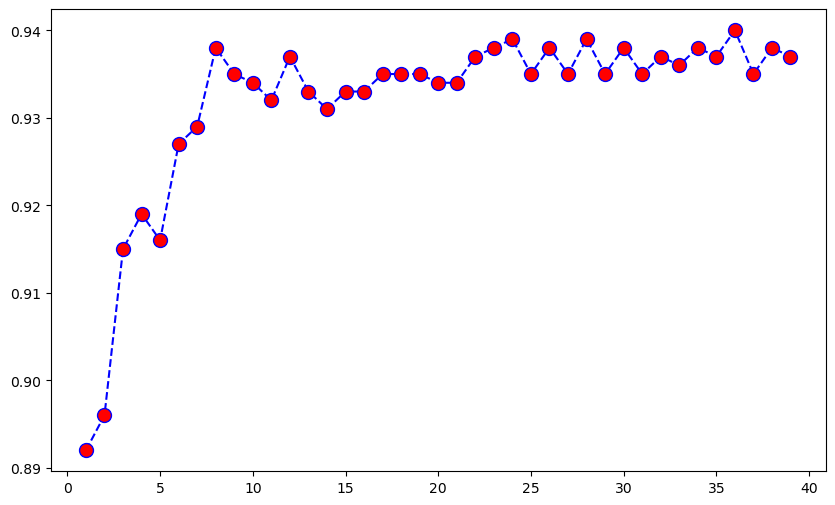

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [50]:
df1=sns.load_dataset('iris')

<IPython.core.display.Javascript object>

In [51]:
df1

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [53]:
df1['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<IPython.core.display.Javascript object>

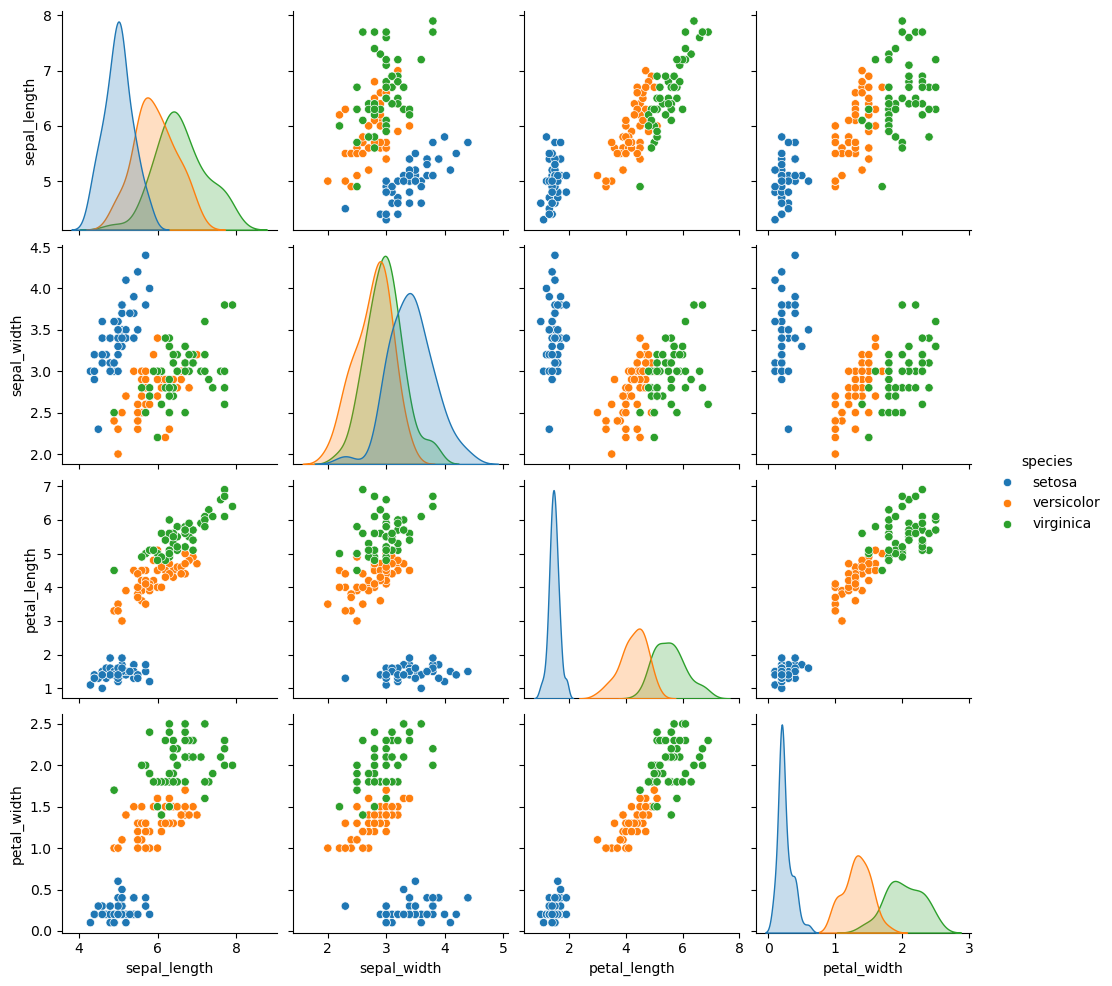

In [54]:
sns.pairplot(df1,hue='species')